## Press-Schechter Formalism

Spherical collapse models predict the end state of a density perturbation is a Virialized halo given an initial density perturbation

If we assume the initial density perturbations are a
Gaussian random field, then we can predict the
fraction-of-material/properties of collapsed
objects.

We can smooth the density field to an arbitrary mass scale, which is related to size by the definition of density: $$R = \left(\frac{3 M}{4}\right)^{1/3}$$

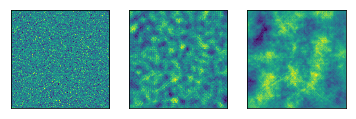

In [10]:
%matplotlib inline
import pylab as pl
from astropy.convolution import convolve, Tophat2DKernel
with pl.style.context({'xtick.labelbottom': False,
                       'xtick.bottom': False,
                       'ytick.left': False,
                       'ytick.labelleft': False}):
    g_rand = np.random.randn(100,100)
    pl.subplot(1,3,1).imshow(g_rand)
    pl.subplot(1,3,2).imshow(convolve(g_rand,
                                      Tophat2DKernel(3)))
    pl.subplot(1,3,3).imshow(convolve(g_rand,
                                      Tophat2DKernel(9)))

For any adopted mass scale, this results in a
distribution function of overdensities, which can
be described with Gaussian random field, with a
variance that depends on the mass, $\sigma(M)$.

We can then calculate the fraction of material that
is above the required collapse overdensity:

$$f_{coll} = \frac{1}{\sqrt{2 \pi} \sigma(M)} 
    \int_{\delta_c}^\infty d\delta \exp\left(-\frac{\delta^2}{2 \sigma^2(M)}\right)$$


This term: $\frac{1}{\sqrt{2 \pi} \sigma(M)} $ is a normalization constant such that $f_{coll}(\delta_c = -\infty) = 1$ (but we'll see later that this creates a necessity for some sleight-of-hand, since $\delta_c$ is defined to be positive).  The term inside the integral is just a Gaussian.

This has the "analytic" solution
$$f_{coll}(\delta_c, M) = \frac{1}{2}
\mathrm{erf}\left(\frac{\delta_c}{\sigma(M) \sqrt{2}}\right)$$
(Paul's notes have erfc$\equiv1-$erf here, but I'm pretty sure it's just erf)

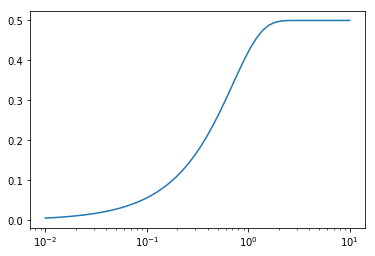

In [18]:
from scipy.special import erf
pl.semilogx(np.logspace(-2, 1),
        0.5 * erf(np.logspace(-2,1)))

Note that 
$$f_{coll} = f_{coll}(>M)$$
i.e., the collapsed fraction depends on the selected smoothing scale (and the mass *above* that mass scale has all collapsed)

We now have the tools to write down the number
of haloes as a function of mass scale.


To do this, we simply differentiate with respect to
mass to determine how the mass fraction is 
changing as a function of mass, and include
appropriate terms to convert the mass in haloes
to a number of haloes:

$$n(M) dM = \frac{\rho_{M,0}}{M} \frac{\partial}{\partial M} \left(f_{coll}(>M)\right) dM$$

Note that this is the generic form of a mass function, i.e., $n(m) dm = f(m) dm$, and we'll revisit it...

The error function [is analytically differentiable](https://en.wikipedia.org/wiki/Error_function#Derivative_and_integral):
$${\displaystyle {\frac {d}{dz}}\operatorname {erf} (z)={\frac {2}{\sqrt {\pi }}}e^{-z^{2}}}$$

Plugging that in above, we get:
$$n(M) dM = 
\frac{1}{ \sqrt{ 2 \pi}}
\frac{\rho_{M,0}}{M^2}
\frac{\delta_c}{\sigma(M)}
\left| \frac{d \ln \sigma}{d\ln M} \right|
\exp\left(\frac{\delta_c^2}{2\sigma^2(M)}\right)
dM$$

We return to the sleight-of-hand mentioned above: in this formalism, only overdensities can participate in collapse.  Overdensities are definitionally above the mean density, so only half of the universe is overdense, and therefore only half of the matter in the universe can ever collapse.

The solution is to multiply by a factor of two and pretend the problem is gone.

$$n(M) dM = 
\sqrt{\frac{2}{\pi}}
\frac{\rho_{M,0}}{M^2}
\frac{\delta_c}{\sigma(M)}
\left| \frac{d \ln \sigma}{d\ln M} \right|
\exp\left(\frac{\delta_c^2}{2\sigma^2{M}}\right)
dM$$

(Adam's commentary: could we have just normalized the original integral such that $f_{coll}(\delta_c=0) = 1$?  Let's ask Paul later....) 

In more detail, we can solve for this ‘factor of two’ using “excursion set” formalism that take a bit more care when treating/counting overdense regions.

(Adam's aside: the 'excursion set' formalism accounts for overdensities-on-overdensities and plays an important role in some star formation theories)

Powerful idea: Press-Schechter formalism provides us an easy way to relate known fluctuations in the density field into a halo mass function.

We can use the CMB (possibly with other constraints) to set density distributions:
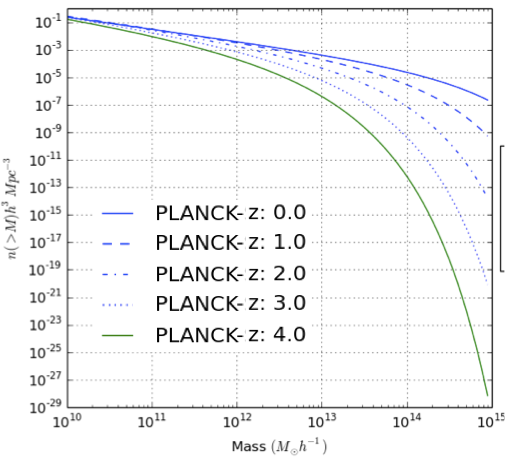